#Table Of Content

1. Environment Setup
2. The continuous Uniform Distribution
3. Python Implementation
4. Paractical Python Examples


#Environment Set up

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import seaborn as sns


#Continuous Uniform Distribution


The continuous uniform distribution is a probability distribution that describes an equally likely chance of a continuous random variable occurring within a specific range. You can think of it this way, it's like flipping a fair coin or rolling a fair die, where each outcome is equally likely within a given range. Imagine a situation where you have a range of values from 'a' to 'b', and any value within this range is equally likely to occur;




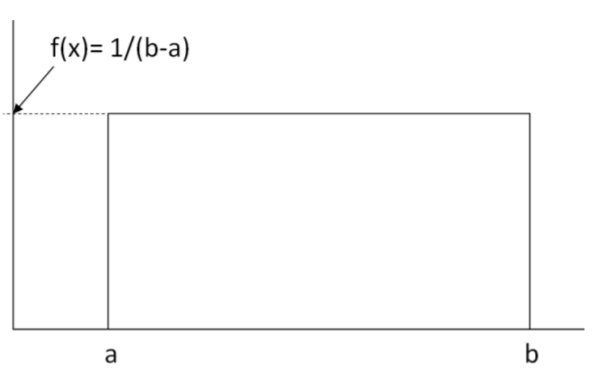

 For instance, suppose you're picking a random number between 1 and 10. In this scenario, each number between 1 and 10 has an equal probability of being chosen.

In [ ]:

# Define the range (a and b)
a = 1  # Lower bound
b = 20  # Upper bound

# Create a continuous uniform distribution object from 'a' to 'b'
uniform_dist = uniform(loc=a, scale=b-a)


`loc`: Represents the starting point or the lower bound of the range.

`scale`: Defines the width or the distance between the lower and upper bounds. It's often calculated as the difference between the upper bound and the lower bound (scale = upper bound - lower bound).


[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html):


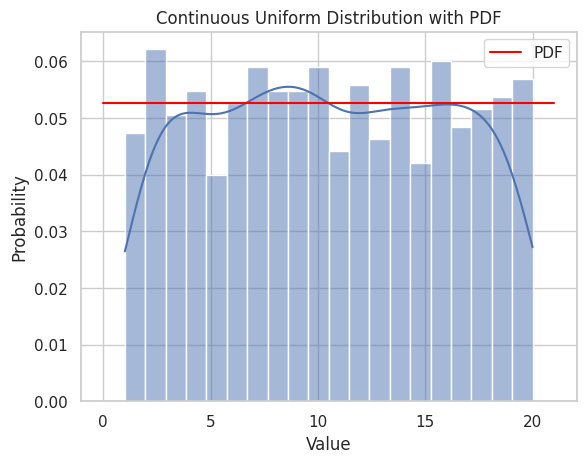

In [ ]:

# Generate random numbers following this distribution
random_numbers = uniform_dist.rvs(size=1000)  # Generating 1000 random numbers

# Plot using Seaborn with PDF and histogram
sns.set(style="whitegrid")  # Set the style for the plots
sns.histplot(random_numbers, kde=True, stat="density", bins=20)
x = [i for i in range(a - 1, b + 2)]  # Creating x values for the PDF line
y = [1 / (b - a) for _ in range(len(x))]  # Creating y values for the PDF line
plt.plot(x, y, color='red', label='PDF')  # Plot the PDF line
plt.title('Continuous Uniform Distribution with PDF')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

NOTE: Although these numbers are generated according to a uniform distribution, due to the finite sample size, there might be slight fluctuations in the observed frequencies of each value.  With a larger sample size, the distribution would appear closer to being perfectly uniform. Observe what happens when we simply increase n to 1, 000, 000, 000;



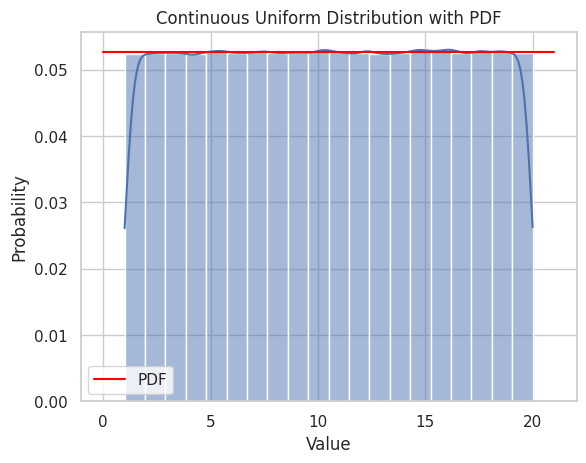

In [ ]:

# Generate random numbers following this distribution
random_numbers2 = uniform_dist.rvs(size=1000000)  # Generating 1000 random numbers

# Plot using Seaborn with PDF and histogram
sns.set(style="whitegrid")  # Set the style for the plots
sns.histplot(random_numbers2, kde=True, stat="density", bins=20)
x = [i for i in range(a - 1, b + 2)]  # Creating x values for the PDF line
y = [1 / (b - a) for _ in range(len(x))]  # Creating y values for the PDF line
plt.plot(x, y, color='red', label='PDF')  # Plot the PDF line
plt.title('Continuous Uniform Distribution with PDF')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

That's what should come to mind when we speak of the theoretical continuous uniform distribution. The PDF is thus simply defined as;



>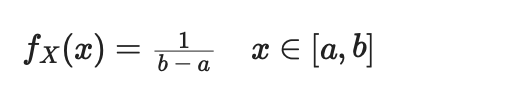

It then follows that the expected value (mean) can be calculated using



>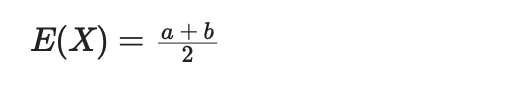

Similarly, the variance;

>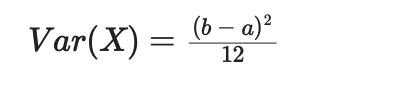

NOTE: A uniform distribution with 𝐚 = 0 and 𝒃 = 1 is called a Standard Uniform Distribution


The cumulative density function is as follows;



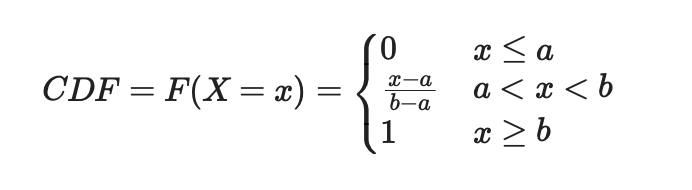

#Python Implementation



To find a point that has a right probability of
p use

`uniform.isf(p, loc, scale)`

To find a point that has a left probability of
p use ;

`uniform.isf(1-p, loc, scale)`


For exampleTo find a point that has a right probability of
p use

`uniform.isf(p, loc, scale)`

To find a point that has a left probability of
p use ;

`uniform.isf(1-p, loc, scale)`


In [ ]:
p = 0.75
a = 2
b = 4
loc = a
scale = b - loc
print(f'The point in the U({a},{b}) Distribution that has a right probability of *{p}*: ', uniform.isf(p, loc, scale))
print(f'The point in the U({a},{b}) Distribution that has a left probability of *{p}*: ', uniform.isf(1-p, loc, scale))

The point in the U(2,4) Distribution that has a right probability of *0.75*:  2.5
The point in the U(2,4) Distribution that has a left probability of *0.75*:  3.5


To find the left probability of a point use;

```
# uniform.cdf(X, loc, scale)
```

To find the right probability of a point, use:  

```
uniform.sf(X,loc,scale)
```




In [ ]:
X = 3.5
a = 2
b = 4
loc = a
scale = b - loc
print(f'The left probability of point *{X}* in the U({a},{b}) Distribution is: ', uniform.cdf(X, loc, scale))
print(f'The Right probability of point *{X}* in the U({a},{b}) Distribution is: ', uniform.sf(X, loc, scale))

The left probability of point *3.5* in the U(2,4) Distribution is:  0.75
The Right probability of point *3.5* in the U(2,4) Distribution is:  0.25


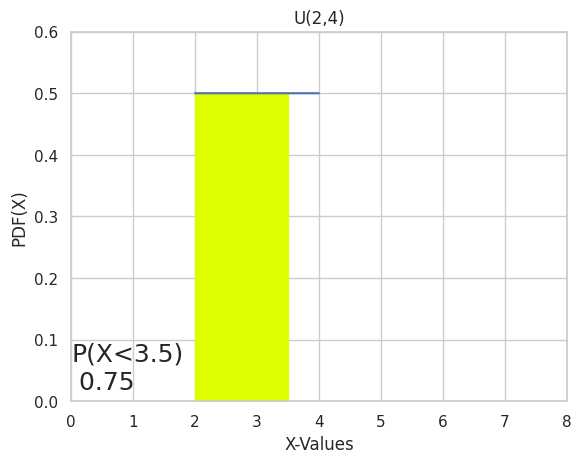

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(a, b, 0.001)
ax.plot(x, uniform.pdf(x, loc, scale))
ax.set_title(f'U({a},{b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(a, X, 0.001)
ax.set_ylim(0, 0.6)
ax.set_xlim(0, 8)
ax.fill_between(px, uniform.pdf(px, loc, scale), color='#DFFF00')

prob = uniform.cdf(X, loc, scale)
ax.text(0, 0.02, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

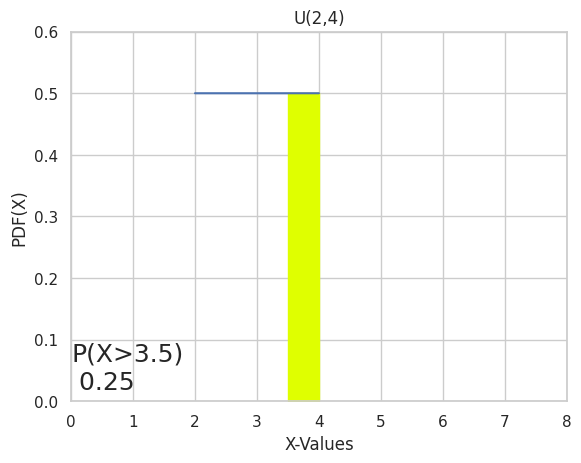

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x = np.arange(a, b, 0.001)
ax.plot(x, uniform.pdf(x, loc, scale))
ax.set_title(f'U({a},{b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(X, b, 0.001)
ax.set_ylim(0, 0.6)
ax.set_xlim(0, 8)
ax.fill_between(px, uniform.pdf(px, loc, scale), color='#DFFF00')

prob = uniform.sf(X, loc, scale)
ax.text(0, 0.02, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points use:

```
uniform.cdf(Y,loc,scale) - uniform.cdf(X,loc,scale)
 ```



In [ ]:
X = 2.5
Y = 3.5
a = 2
b = 4
loc = a
scale = b - loc
print(f'The probability between *({X}, {Y})* in the U({a},{b}) Distribution is: ', uniform.cdf(Y,loc,scale) - uniform.cdf(X,loc,scale))

The probability between *(2.5, 3.5)* in the U(2,4) Distribution is:  0.5


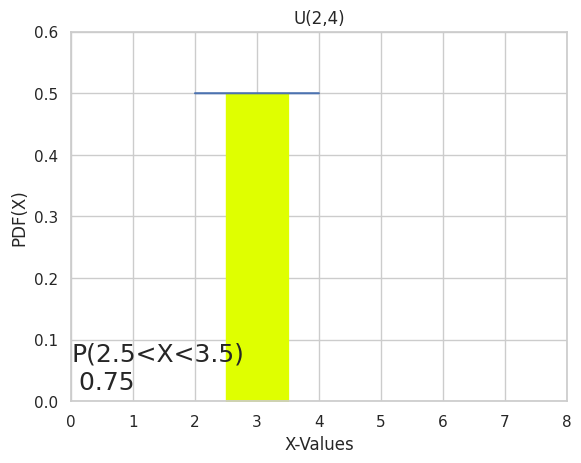

In [ ]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(a, b, 0.001)
ax.plot(x, uniform.pdf(x, loc, scale))
ax.set_title(f'U({a},{b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(X, Y, 0.001)
ax.set_ylim(0, 0.6)
ax.set_xlim(0, 8)
ax.fill_between(px, uniform.pdf(px, loc, scale), color='#DFFF00')

prob = 1-uniform.cdf(X, loc, scale)
ax.text(0, 0.02, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18);


#Practical Python Example

#Practical Example 1

Suppose we have a dataset representing the time, in minutes, taken by individuals to solve a particular puzzle. The data is as follows:

```
3.2, 4.5, 6.1, 2.8, 5.4, 7.6, 3.9, 8.2, 4.1, 5.8,
6.9, 7.2, 4.7, 5.5, 3.5, 2.3, 6.6, 4.9, 7.1, 5.3
```





Suppose we assume that the time taken to solve the puzzle follows a uniform distribution between 2 and 8 minutes, inclusive. Any time taken from 2 to 8 minutes is equally likely. Let's start by visualizing the data in a histogram to show the distribution.

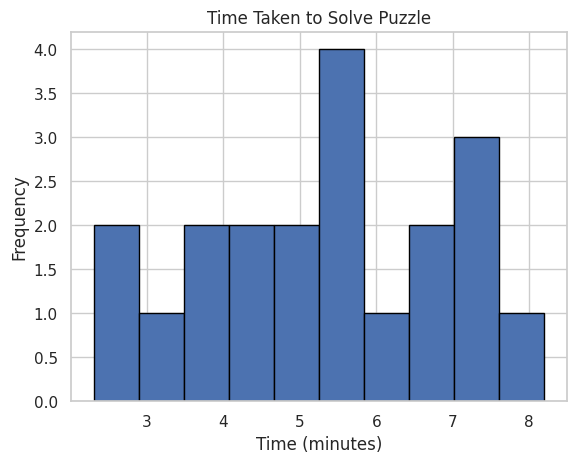

In [ ]:
# Dataset representing time taken to solve a puzzle
times = [3.2, 4.5, 6.1, 2.8, 5.4, 7.6, 3.9, 8.2, 4.1, 5.8, 6.9, 7.2, 4.7, 5.5, 3.5, 2.3, 6.6, 4.9, 7.1, 5.3]

# Plotting the histogram
plt.hist(times, bins=10, edgecolor='black')
plt.title('Time Taken to Solve Puzzle')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()

Now, let's calculate the theoretical mean and standard deviation for this uniform distribution scenario.



In [ ]:
# Given a  range (a=minimum and b = maximum) for the uniform distribution
a = 2  # Lower bound
b = 8  # Upper bound



Since we know that

>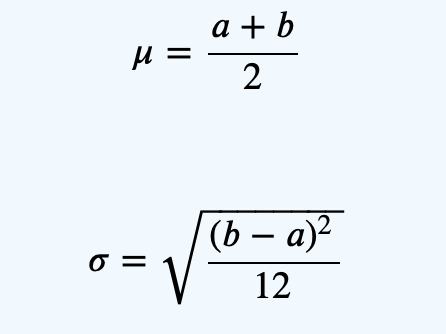

In [ ]:
# Calculate theoretical mean and standard deviation
theoretical_mean = (a + b) / 2
theoretical_std = ((b - a) ** 2 / 12) ** 0.5

print(f"Theoretical mean: {theoretical_mean:.2f} minutes")
print(f"Theoretical standard deviation: {theoretical_std:.2f} minutes")


Theoretical mean: 5.00 minutes
Theoretical standard deviation: 1.73 minutes


#Practical Example 2


Imagine a scenario where people arrive at a store uniformly between 9 AM and 11 AM. You record the arrival times of 25 customers:

```
9:10, 9:25, 10:15, 9:30, 10:45, 9:50, 10:05, 10:30, 9:15, 9:40, 10:20, 10:10, 9:55, 10:40, 9:20, 10:35, 9:45, 10:50, 10:00, 9:05, 10:25, 10:55, 9:35, 9:00, 10:50
```


Assuming a uniform distribution of arrival times between 9 AM and 11 AM, you plan to explore the uniformity in customer arrivals.

In [ ]:
# Dataset of arrival times
arrival_times = [10, 25, 75, 30, 105, 50, 65, 90, 15, 40, 80, 70, 55, 100, 20, 95, 45, 110, 60, 5, 85, 115, 35, 0, 110]

# Parameters for the uniform distribution
a_arrival = 0
b_arrival = 120
# Creating the uniform distribution object
uniform_dist_arrival = uniform(loc=a_arrival, scale=b_arrival - a_arrival)


a ) Find the probability that the arrival time is between 40 and 80 (mins);



In [ ]:
prob_between_40_80 = uniform_dist_arrival.cdf(80) - uniform_dist_arrival.cdf(40)
print(f"Probability that the arrival time is between 40 and 80 minutes: {prob_between_40_80:.4f}")


Probability that the arrival time is between 40 and 80 minutes: 0.3333


b) Find the probability that an arrival time is greater than 60

In [ ]:

prob_greater_than_60 = 1 - uniform_dist_arrival.cdf(60)
print(f"Probability that the arrival time is greater than 60 minutes: {prob_greater_than_60:.4f}")

# Find the probability that the arrival time is less than 30
prob_less_than_30 = uniform_dist_arrival.cdf(30)
print(f"Probability that the arrival time is less than 30 minutes: {prob_less_than_30:.4f}")

Probability that the arrival time is greater than 60 minutes: 0.5000
Probability that the arrival time is less than 30 minutes: 0.2500


c) Find the probability that the arrival time is less than 30


In [ ]:
prob_less_than_30 = uniform_dist_arrival.cdf(30)
print(f"Probability that the arrival time is less than 30 minutes: {prob_less_than_30:.4f}")

Probability that the arrival time is less than 30 minutes: 0.2500


#Practical Example 3


Consider students' study session lengths, assuming they vary uniformly between 30 minutes and 2 hours. You record the study times for 20 students:


```
40, 50, 60, 90, 35, 120, 80, 45, 75, 100, 55, 70, 110, 65, 95, 85, 120, 40, 30, 60
```






In [ ]:
# Dataset of study session lengths
study_sessions = [40, 50, 60, 90, 35, 120, 80, 45, 75, 100, 55, 70, 110, 65, 95, 85, 120, 40, 30, 60]

# Parameters for the uniform distribution
a_study = 30
b_study = 120

# Creating the uniform distribution object
uniform_dist_study = uniform(loc=a_study, scale=b_study - a_study)



a) Find the probability that the arrival time is between 40 and 80)

In [ ]:
prob_between_40_80 = uniform_dist_arrival.cdf(80) - uniform_dist_arrival.cdf(40)
print(f"Probability that the arrival time is between 40 and 80 minutes: {prob_between_40_80:.4f}")

Probability that the arrival time is between 40 and 80 minutes: 0.3333


b) Find the probability that an arrival time is greater than 60

In [ ]:
prob_greater_than_60 = 1 - uniform_dist_arrival.cdf(60)
print(f"Probability that the arrival time is greater than 60 minutes: {prob_greater_than_60:.4f}")


Probability that the arrival time is greater than 60 minutes: 0.5000


c) Find the probability that the arrival time is less than 30

In [ ]:
prob_less_than_45 = uniform_dist_study.cdf(45)
print(f"Probability that the study session length is less than 45 minutes: {prob_less_than_45:.4f}")

Probability that the study session length is less than 45 minutes: 0.1667


#Appendix

The continuous uniform distribution is a probability distribution where all values within a defined range are equally likely to occur. It is characterized by a constant probability density function (pdf) over a continuous interval, defined by two parameters: the lower bound (`a`) and the upper bound (`b`).

#Characteristics:

- **Notation:** (X) follows a continuous uniform distribution denoted as (U(a, b))
- **PDF (Probability Density Function):** Uniformly flat probability distribution over the interval ([a, b])

- **CDF (Cumulative Distribution Function):** Linearly increasing cumulative probability from (a) to (b)

#Properties:

- **Equal Probability:** All values within the range ([a, b]) have the same chance of occurrence.
- **Rectangular Shape:** The probability density graph appears as a flat line between (a) and (b).
- **CDF Slope:** The cumulative distribution graph shows a linear increase between (a) and (b).
- **Expected Value (Mean):** The mean is the average of the lower and upper bounds, (E(X) = (a+ b)/2).
- **Variance:** The variance is a measure of spread within the distribution, calculated as Var(X) =(b - a)^2/12.

## Applications:

- **Modeling Ranges:** Suitable for situations where outcomes are uniformly distributed within a specified continuous interval.

## Practical Use:

- **Simulation Studies:** Valuable in simulations where random variables are required within a specific range.e.g Consider a game developer creating a virtual dice roll. The developer needs to simulate fair dice rolls where each number (1 to 6) is equally likely. The continuous uniform distribution can model this scenario. Using a random number generator that follows a uniform distribution between 1 and 6, each outcome has an equal chance of occurring, simulating the fairness of a physical dice.

- **Statistical Analysis:** Applicable in statistical testing, particularly when equal probability assumptions are valid.
e.g Suppose an analyst needs to verify if a random number generator truly produces numbers with equal probability between 0 and 1. By running statistical tests on a set of generated numbers and comparing their distribution to an ideal uniform distribution, they can assess whether the generator is functioning correctly. If the generated values adhere to a uniform distribution, it supports the assumption of equal probability within the specified range.







# Additional Reading Resources


- [Wolfram MathWorld - Continuous Uniform Distribution](https://mathworld.wolfram.com/ContinuousUniformDistribution.html)


- [Los Angeles City College - Continuous Random Variables: The Uniform Distribution](https://stats.libretexts.org/Courses/Los_Angeles_City_College/Introductory_Statistics/05%3A_Continuous_Random_Variables/5.03%3A_The_Uniform_Distribution)

- [Penn State University - Continuous Uniform Distribution](https://online.stat.psu.edu/stat414/lesson/14/14.6)
- [Physics and Maths Tutor - Continuous Distributions: Uniform (PDF)](https://pmt.physicsandmathstutor.com/download/Maths/A-level/S2/Topic-Qs/Edexcel-Set-1/S2%20Continuous%20distributions%20-%20Uniform.pdf)
- [Statistics How To - Uniform Distribution](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/uniform-distribution/)
-  [Statlect - Uniform Distribution](https://www.statlect.com/probability-distributions/uniform-distribution)
-  [Texas Gateway - Uniform Distribution](https://www.texasgateway.org/resource/52-uniform-distribution)
-  [UCSD Math - Continuous Uniform Distribution](https://mathweb.ucsd.edu/~gptesler/283/slides/283_exp_15-handout.pdf)
-  [Statproofbook - Continuous Uniform Distribution](https://statproofbook.github.io/P/cuni-mode.html)
-  [Milefoot - Continuous Uniform Distribution](https://www.milefoot.com/math/stat/pdfc-uniformcont.htm)
- [Finance Train - Continuous Uniform Distribution](https://financetrain.com/continuous-uniform-distribution)
-  [TutorialsPoint - Continuous Uniform Distribution](https://www.tutorialspoint.com/statistics/continuous_uniform_distribution.htm)
